# Practice Project 5 - Titanic Project

## Importing necessary libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import joblib

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

**From the first glance, it appears that the dataset has a mix of continuous and categorical data across features, while the label "Survived" is definitely categorical, also making it a classification problem.**

## Dataframe/Dataset description

The Titanic problem is based on the sinking of the 'Unsinkable' ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict in an arbitrary passenger on Titanic would survive the sinking the sinking or not.

We have the following features in the dataset:

1. Pclass - ticket class of the passenger
2. Sex - gender of the passengers
3. Age - age of the passengers
4. SibSp - number of siblings/spouses on board
5. Parch - number of parents/children on board
6. Fare - ticket fare paid by the passengers
7. Cabin - cabin number allocated to the passenger
8. Embarked - port from which the passenger embarked on their journey

The label/target is as follows:
- Survived - whether the passenger survived or not

## EDA

In [4]:
# basic summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**From the above, we can see some features/columns have null values**

In [5]:
# summary descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# checking the unique elements in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Relationship b/w dependent and independent variables

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Finding: There appears to be some imbalance in the label.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

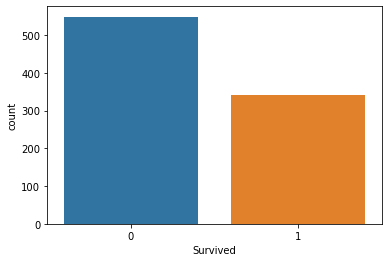

In [8]:
# checking for imbalance through countplot
sns.countplot(df['Survived'])

**Finding: the classes in the label are definitely imbalanced**

## Analyzing the categorical classes

In [9]:
df['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

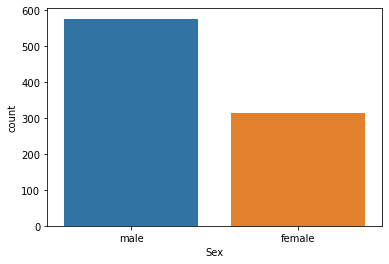

In [12]:
sns.countplot(df['Sex'])

**Finding:** the sex of majority of the passengers is MALE.

In [13]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [14]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Finding:** Majority of the passengers fall in passenger class 3, followed by passenger class 1 and 2.

In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df['Embarked'].isnull().sum()

2

In [18]:
df.loc[pd.isna(df["Embarked"]), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Finding:** 2 null values in column from where passengers embarked on their journey. However, predicting port where passengers embarked on the journey would be unfair. Therefore, we may drop the two rows as it will not impact, or cause any significant loss to the training and test datasets.

In [19]:
df.drop([61,829],inplace=True)

In [21]:
df.shape

(889, 12)

In [22]:
df.reset_index(drop=True,inplace = True)

In [23]:
df['Embarked'].isnull().sum()

0

In [24]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Removing any unwanted column based on null values

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Finding:** Most of the values in column "Cabin" are null values, it will not help build an effective model, thus, we remove the column.

In [26]:
df.drop(columns=['Cabin'],inplace = True)

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Encoding categorical data

In [28]:
df['Sex'] = df.Sex.map({'female':0,'male':1})

In [30]:
dumm = pd.get_dummies(df['Embarked'],drop_first = False)

In [31]:
dumm

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [32]:
df = df.join(dumm)

In [33]:
df.drop(columns = ['Embarked'],axis = 1, inplace = True)

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,0,1
885,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,0,1
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,0,0,1
887,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,0,0


**Observation:** We observe that "PassengerId", "Name" and "Ticket" are irrelevant to predicting the target "Survived". Hence, we may drop the columns for building the model.

In [35]:
df.drop(columns = [ 'PassengerId','Name','Ticket'],inplace = True)

In [36]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0,0,1
885,1,1,0,19.0,0,0,30.0000,0,0,1
886,0,3,0,NaN,1,2,23.4500,0,0,1
887,1,1,1,26.0,0,0,30.0000,1,0,0


**Observation:** As per our previous findings, "Age" also has several null values. Therefore, we may use Mean / Imputer to fill in the null values.

<AxesSubplot:xlabel='Age'>

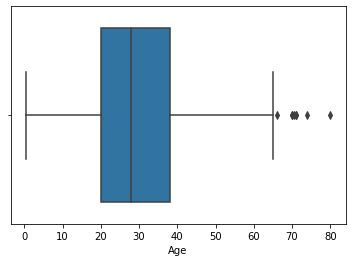

In [40]:
sns.boxplot(df['Age'])

**Finding:** There is presence of outliers in the "Age" column. Hence, filling the null values present with the mean may not be accurate.

In [38]:
imp = KNNImputer(n_neighbors=2)

In [39]:
df2 = df.copy()

In [41]:
df2 = imp.fit_transform(df2[['Sex','Age']])

In [42]:
df2

array([[ 1., 22.],
       [ 0., 38.],
       [ 0., 26.],
       ...,
       [ 0., 32.],
       [ 1., 26.],
       [ 1., 32.]])

In [43]:
type(df2)

numpy.ndarray

In [44]:
#converting array into dataframe
df2 = pd.DataFrame(df2, columns=['Sex','Age'])

In [45]:
df2.index = df.index

In [46]:
df[['Age','Sex']] = df2[['Age','Sex']]

In [47]:
df['Age'].isnull().sum()

0

**Observation:** No more null values in "Age". Good to proceed after a null value re-check.

In [48]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

## Establishing correlations

In [49]:
df_corr = df.corr()
df_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.061387,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327795,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.065452,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.061387,-0.327795,0.065452,1.000000,-0.225819,-0.173839,0.091212,0.034131,-0.004313,-0.027190
SibSp,-0.034040,0.081656,-0.116348,-0.225819,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.173839,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.091212,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
C,0.169966,-0.245733,-0.084520,0.034131,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.004313,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.027190,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


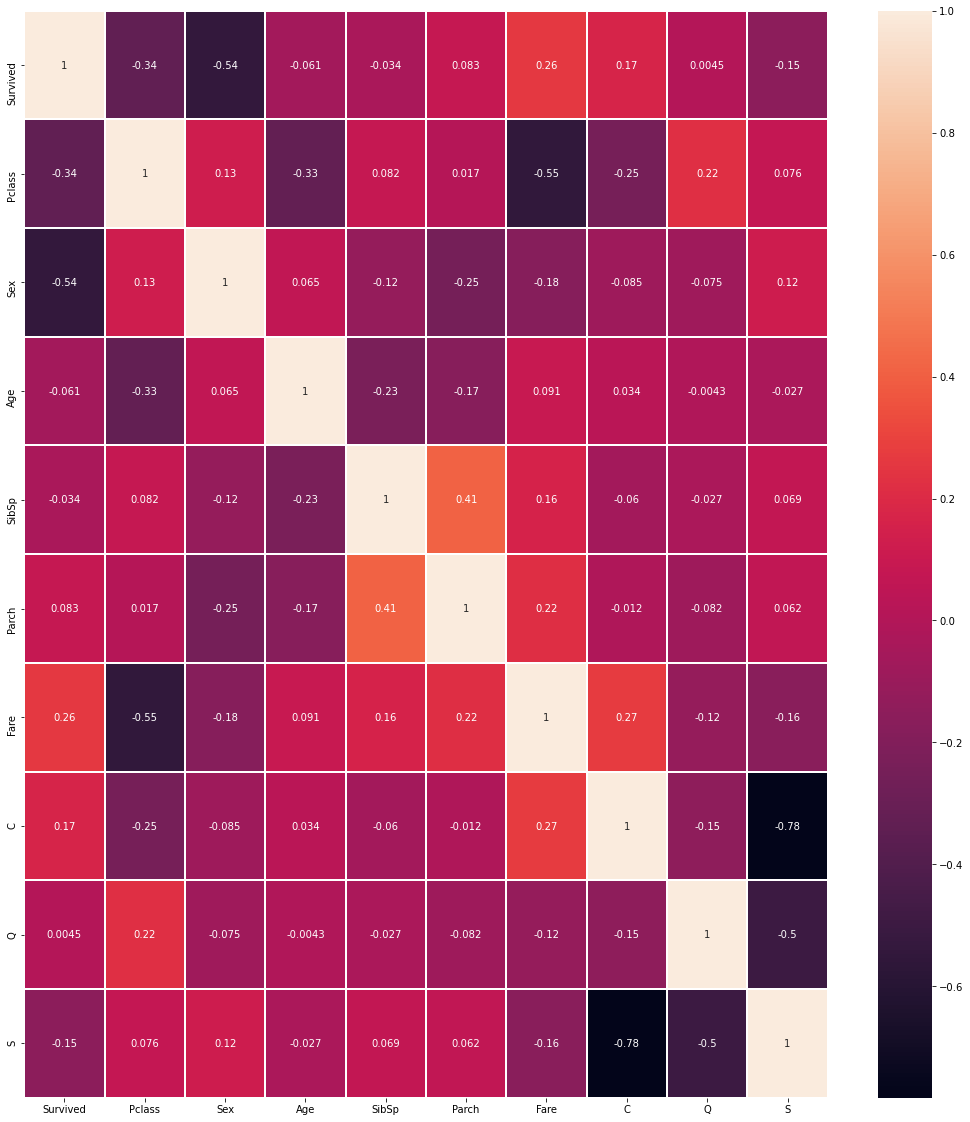

In [50]:
plt.figure(figsize=(18,20))
sns.heatmap(df_corr,annot=True,linewidth=1)
plt.show()

## Correlation of features with target/label

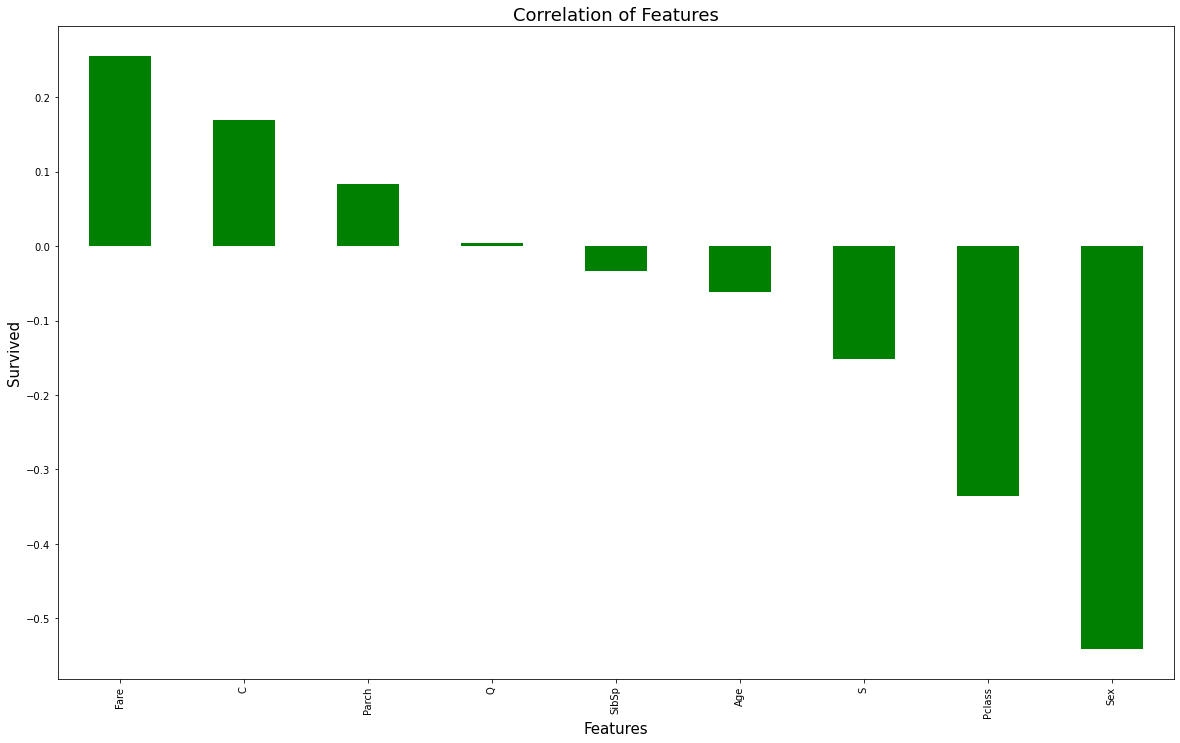

In [54]:
plt.figure(figsize = (20,12))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Features',fontsize = 18)
plt.show()

**Findings:**
1. Fare has a considerable positive correlation with survival, implying passengers who paid higher fare were given priority.
2. Sex has a significantly negative correlation with survival, and with majority Males onboard, it may imply Males were given lesser priority in saving lives as compared to females.
3. It is also evident that Pclass has a negative correlation with survival, and with most passengers in Pclass 3, it may imply passengers with Pclass 1 were given priority over Pclass 3 passengers in terms of rescue.

In [55]:
# separating features and label
X = df.drop(columns = ['Survived'])
y = df['Survived']

## Relationship between Dependent Variable and Independent Variables

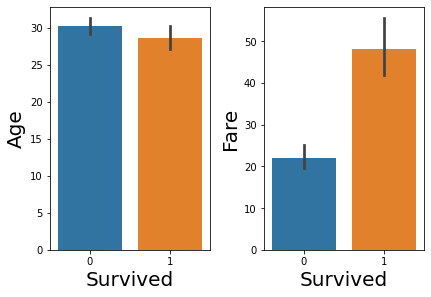

In [56]:
plt.figure(figsize=(15,20))
plotnum=1
y = df['Survived']
X = df[['Age','Fare']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

**Findings:** 
1. Passenger age and survival do not appear to have a very strong correlation, as also evident in the correlation check above.
2. It is also evident from the absolute numbers that passengers who paid higher fares had a very high chance of survival.

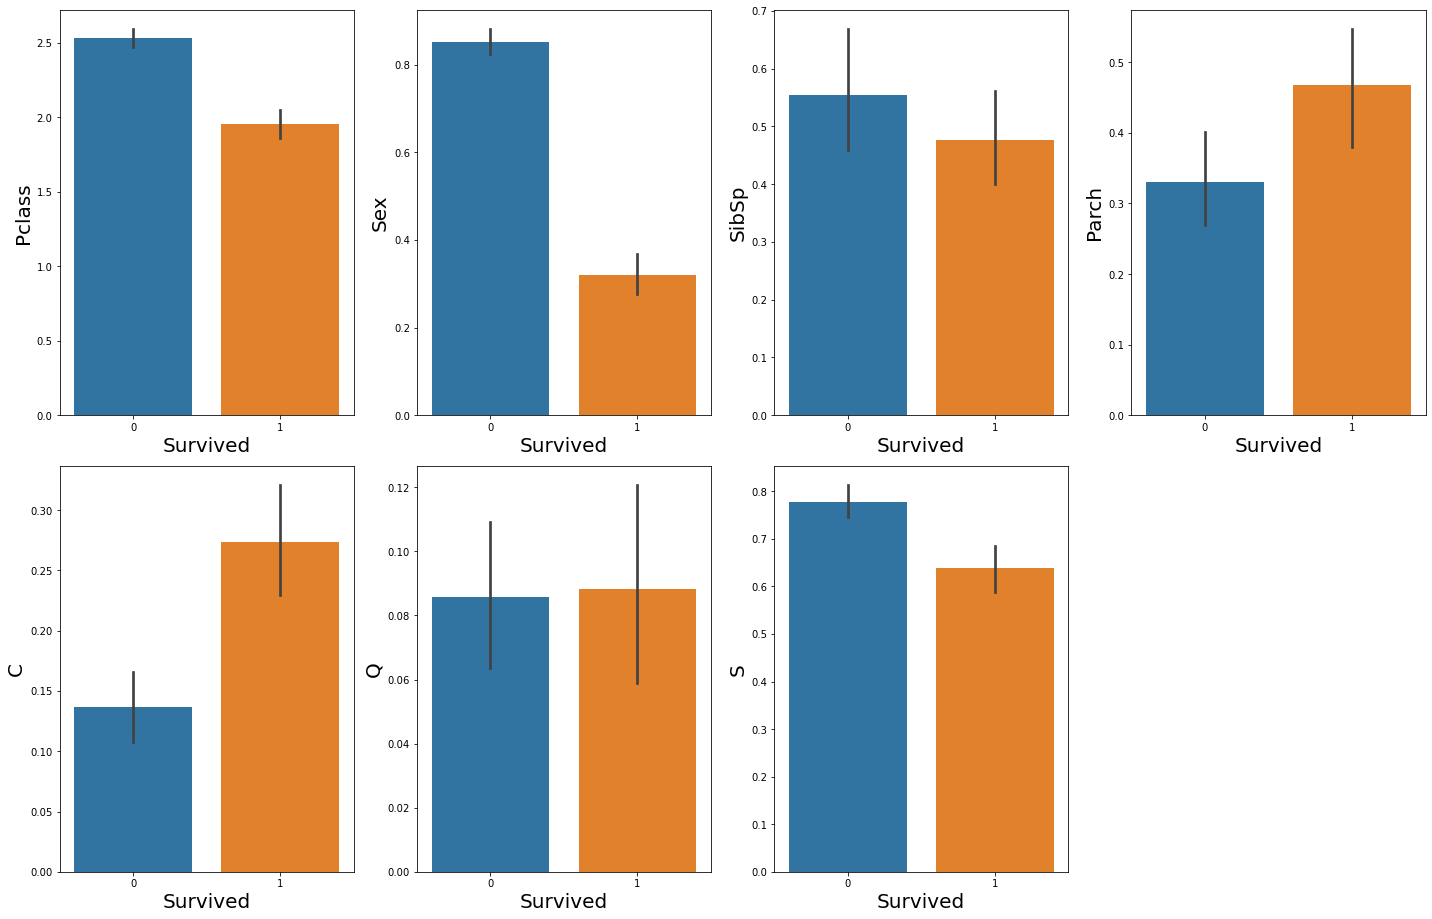

In [60]:
plt.figure(figsize=(20,25))
plotnum=1
y = df['Survived']
X = df.drop(columns=['Survived','Age','Fare'])
for col in X:
    if plotnum<=23:
        plt.subplot(4,4,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

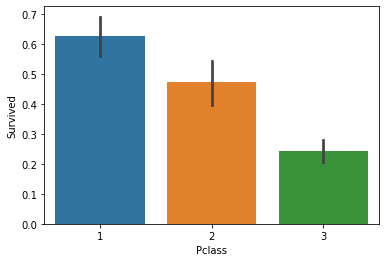

In [59]:
sns.barplot(x='Pclass', y='Survived', data=df)

**Findings:** The above confirm our earlier findings that passengers in Pclass 1 and 2 had higher survival rates. Also, women had higher survival rates than men.

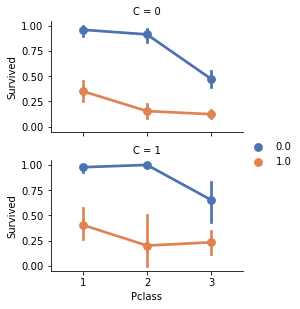

In [66]:
grid = sns.FacetGrid(df, row='C', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

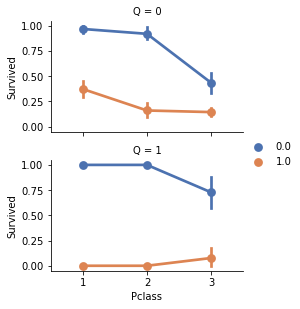

In [67]:
grid = sns.FacetGrid(df, row='Q', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

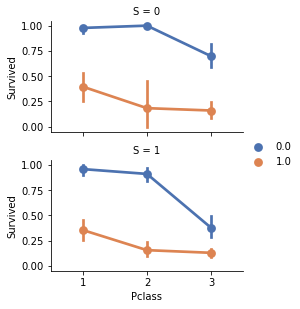

In [68]:
grid = sns.FacetGrid(df, row='S', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Findings:**
1. Female passengers had much better survival rate than males.
2. Passengers who embarked from 'C' had higher chance of Survival than those who had embarked from 'Q' and 'S
3. Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S

**Combining 'SibSP' and 'Parch' to get a better understanding of correlation between survivors and passengers traveling with their families.**

In [69]:
df['Families'] = df['Parch']+df['SibSp']

In [70]:
df['Families']

0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    0
886    3
887    0
888    0
Name: Families, Length: 889, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

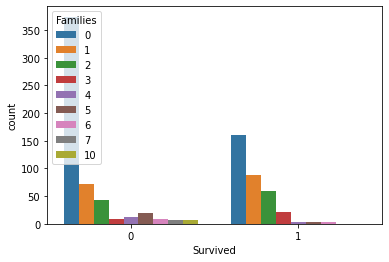

In [71]:
sns.countplot(y, hue = df['Families'])

**Findings:**
1. In terms of survival, solo passengers had the best survival rates.
2. Also, passengers with smaller families had higher chances of survival, as evident from the data.

In [72]:
# dropping columns
df.drop(columns=['SibSp','Parch'],inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

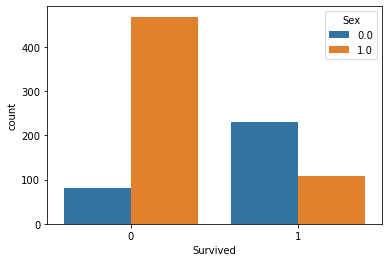

In [73]:
sns.countplot(y, hue =df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

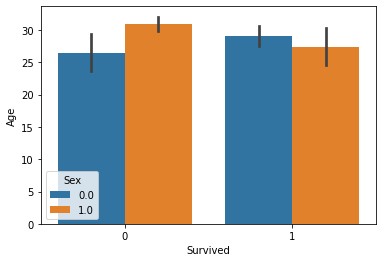

In [74]:
sns.barplot(x =df['Survived'],y = df['Age'], hue = df['Sex'])

**Findings:**
1. Reconfirmed that women had higher survival rates than men.
2. Younger males survived more

In [75]:
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,1.0,22.0,7.2500,0,0,1,1
1,1,1,0.0,38.0,71.2833,1,0,0,1
2,1,3,0.0,26.0,7.9250,0,0,1,0
3,1,1,0.0,35.0,53.1000,0,0,1,1
4,0,3,1.0,35.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
884,0,2,1.0,27.0,13.0000,0,0,1,0
885,1,1,0.0,19.0,30.0000,0,0,1,0
886,0,3,0.0,32.0,23.4500,0,0,1,3
887,1,1,1.0,26.0,30.0000,1,0,0,0


## Identifying outliers in columns

In [76]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

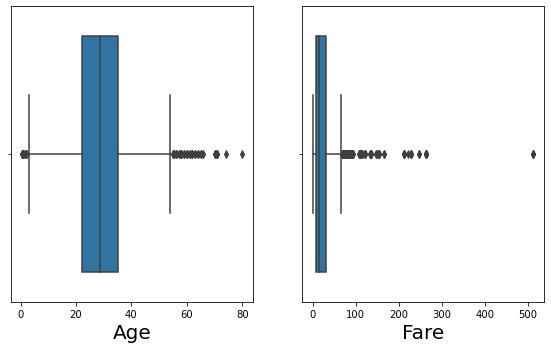

In [77]:
plt.figure(figsize=(20,25))
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Removing outliers from Age and Fare using Z Score

In [78]:
df3 = X[feat].copy()

In [79]:
zscor = zscore(df3)
z_score_abs = np.abs(zscor)

df4 = df3[(z_score_abs < 3).all(axis=1)]

In [80]:
df4.shape

(862, 2)

In [81]:
df3.shape

(889, 2)

In [82]:
# calculating the data loss
loss=(889-862)/889 * 100
loss

3.0371203599550056

In [83]:
dropindx = X.index.difference(df4.index)

In [84]:
dropindx

Int64Index([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
            526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
            849],
           dtype='int64')

In [85]:
df.drop(dropindx,inplace = True)

In [86]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [87]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

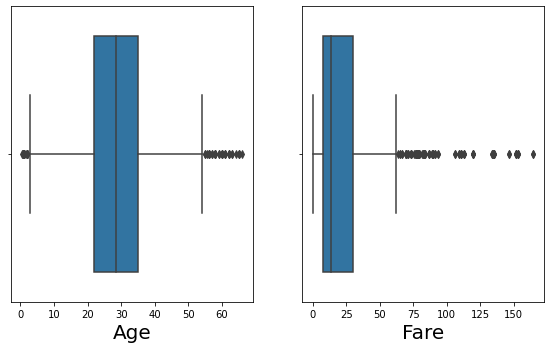

In [88]:
plt.figure(figsize=(20,25))
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

## Further normalizing the distribution

In [89]:
X[feat].skew()

Age     0.238238
Fare    2.279424
dtype: float64

In [90]:
(X[feat]==0).sum()

Age      0
Fare    15
dtype: int64

In [91]:
# using knnimputer to fill in missing values as using mean is not acceptable in this scenario (presence of outliers)
imp = KNNImputer(n_neighbors=2)

In [92]:
X_filled = X.copy()

In [93]:
X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])

In [94]:
X_filled

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [95]:
type(X_filled)

numpy.ndarray

In [96]:
# converting array into dataframe
X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare'])

In [97]:
X_filled.index = X.index

In [98]:
X[['Pclass','Fare']] = X_filled[['Pclass','Fare']]

In [99]:
X['Fare'].isnull().sum()

0

In [100]:
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare        2.279424
C           1.680697
Q           2.910027
S          -1.056235
Families    2.802387
dtype: float64

## Using Power Transformer to reduce skewness

In [102]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [103]:
df5 = X[['Fare','Families']]

In [105]:
trans = pt.fit_transform(df5)

In [106]:
trans = pd.DataFrame(trans, columns=df5.columns)

In [107]:
trans.skew()

Fare       -0.009414
Families    0.546482
dtype: float64

In [108]:
trans.index = X.index

In [109]:
X[['Fare','Families']] = trans[['Fare','Families']]

In [110]:
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare       -0.009414
C           1.680697
Q           2.910027
S          -1.056235
Families    0.546482
dtype: float64

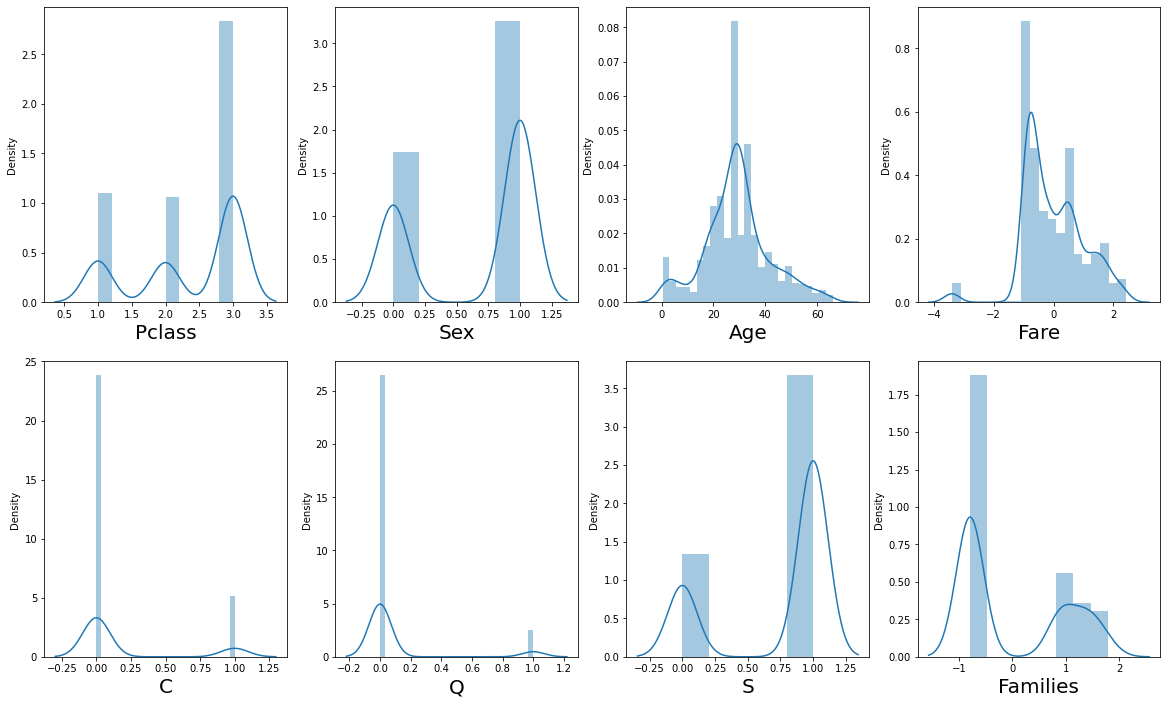

In [111]:
plt.figure(figsize=(20,25))
plotnum=1
for col in X:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Observations:** Distributions appear to be much more normalized than before. It is safe to move to feature selection.

## Feature selection

In [113]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [114]:
scaled_X

array([[ 0.7994893 ,  0.73062154, -0.58138018, ..., -0.31095355,
         0.60326118,  0.90850781],
       [-1.64868042, -1.36869768,  0.702247  , ..., -0.31095355,
        -1.65765681,  0.90850781],
       [ 0.7994893 , -1.36869768, -0.26047338, ..., -0.31095355,
         0.60326118, -0.79210461],
       ...,
       [ 0.7994893 , -1.36869768,  0.22088681, ..., -0.31095355,
         0.60326118,  1.52047922],
       [-1.64868042,  0.73062154, -0.26047338, ..., -0.31095355,
        -1.65765681, -0.79210461],
       [ 0.7994893 ,  0.73062154,  0.22088681, ...,  3.21591437,
        -1.65765681, -0.79210461]])

## Multicollinearity Check using VIF

In [116]:
vif = pd.DataFrame()

In [117]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [118]:
vif

,Features,vif
0,Pclass,2.090198
1,Sex,1.143503
2,Age,1.205194
3,Fare,2.514240
4,C,inf
5,Q,inf
6,S,inf
7,Families,1.656581


**Observation:** No multicollinearity has been observed in the classes

In [121]:
bestfeat = SelectKBest(score_func = f_classif, k = 5)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [122]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

    Feature       Score
1       Sex  339.693591
0    Pclass  105.325560
3      Fare   97.228558
7  Families   28.326530
4         C   23.201391
6         S   19.167697
2       Age    2.575024
5         Q    0.111014


In [123]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [124]:
scaled_X

array([[ 0.7994893 ,  0.73062154, -0.58138018, ..., -0.31095355,
         0.60326118,  0.90850781],
       [-1.64868042, -1.36869768,  0.702247  , ..., -0.31095355,
        -1.65765681,  0.90850781],
       [ 0.7994893 , -1.36869768, -0.26047338, ..., -0.31095355,
         0.60326118, -0.79210461],
       ...,
       [ 0.7994893 , -1.36869768,  0.22088681, ..., -0.31095355,
         0.60326118,  1.52047922],
       [-1.64868042,  0.73062154, -0.26047338, ..., -0.31095355,
        -1.65765681, -0.79210461],
       [ 0.7994893 ,  0.73062154,  0.22088681, ...,  3.21591437,
        -1.65765681, -0.79210461]])

**We can retain all features at this point to build our model.**

## Model Building

In [129]:
# finding best random state
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .25, random_state = i,stratify = y)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8888888888888888 on random_state: 10


In [130]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .25, stratify = y,random_state = 10)

In [131]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr= LogisticRegression()
svc =  SVC()
knn = KNeighborsClassifier()

In [133]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [134]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [135]:
svc.fit(x_train,y_train)

SVC()

In [136]:
lr.fit(x_train,y_train)

LogisticRegression()

In [137]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

## Model Accuracy

In [138]:
# Decision Tree
dt_pred = dt.predict(x_test)
accu = classification_report(y_test,dt_pred)

In [139]:
cm = confusion_matrix(y_test,dt_pred)

In [140]:
cm

array([[123,  12],
       [ 28,  53]], dtype=int64)

In [141]:
print(accu)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       135
           1       0.82      0.65      0.73        81

    accuracy                           0.81       216
   macro avg       0.81      0.78      0.79       216
weighted avg       0.81      0.81      0.81       216



In [146]:
# Logistic Regression
lr_pred = lr.predict(x_test)
accu = classification_report(y_test,lr_pred)

In [147]:
cm = confusion_matrix(y_test,lr_pred)

In [148]:
cm

array([[124,  11],
       [ 29,  52]], dtype=int64)

In [149]:
print(accu)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       135
           1       0.83      0.64      0.72        81

    accuracy                           0.81       216
   macro avg       0.82      0.78      0.79       216
weighted avg       0.82      0.81      0.81       216



In [150]:
# Random Forest
rf_pred = rf.predict(x_test)
accu = classification_report(y_test,rf_pred)

In [151]:
cm = confusion_matrix(y_test,rf_pred)

In [152]:
cm

array([[132,   3],
       [ 21,  60]], dtype=int64)

In [153]:
print(accu)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       135
           1       0.95      0.74      0.83        81

    accuracy                           0.89       216
   macro avg       0.91      0.86      0.88       216
weighted avg       0.90      0.89      0.89       216



In [155]:
# support vector classifier
svc_pred = svc.predict(x_test)
accu = classification_report(y_test,svc_pred)

In [156]:
cm = confusion_matrix(y_test,svc_pred)

In [157]:
cm

array([[135,   0],
       [ 32,  49]], dtype=int64)

In [158]:
print(accu)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       1.00      0.60      0.75        81

    accuracy                           0.85       216
   macro avg       0.90      0.80      0.82       216
weighted avg       0.88      0.85      0.84       216



In [159]:
# K Nearest Neighbors
knn_pred = knn.predict(x_test)
accu = classification_report(y_test,knn_pred)

In [160]:
cm = confusion_matrix(y_test,knn_pred)

In [161]:
cm

array([[131,   4],
       [ 26,  55]], dtype=int64)

In [162]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       135
           1       0.93      0.68      0.79        81

    accuracy                           0.86       216
   macro avg       0.88      0.82      0.84       216
weighted avg       0.87      0.86      0.86       216



## Model Cross Validation

In [164]:
print("Cross Validation Score for Decision Tree: ",cvs(dt,scaled_X,y,cv=5).mean())
print("Cross Validation Score for Logistic Regression: ",cvs(lr,scaled_X,y,cv=5).mean())
print("Cross Validation Score for Random Forest: ",cvs(rf,scaled_X,y,cv=5).mean())
print("Cross Validation Score for SVC: ",cvs(svc,scaled_X,y,cv=5).mean())
print("Cross Validation Score for KNN: ",cvs(knn,scaled_X,y,cv=5).mean())

Cross Validation Score for Decision Tree:  0.7738069633015191
Cross Validation Score for Logistic Regression:  0.7900188197338353
Cross Validation Score for Random Forest:  0.8039991934399785
Cross Validation Score for SVC:  0.8155464444145718
Cross Validation Score for KNN:  0.8121857776582875


**Finding:** 
1. Based on Cross Validation Scores, SVC appears to be the best model.
2. Based on accuracy scores, Random Forest appears to be the best model.

## ROC AUC Scores

In [165]:
print("ROC AUC Score for Decision Tree: ", roc_auc_score(y_test,dt_pred),"\n")
print("ROC AUC Score for Logistic Regression: ", roc_auc_score(y_test,lr_pred),"\n")
print("ROC AUC Score for Random Forest: ", roc_auc_score(y_test,rf_pred),"\n")
print("ROC AUC Score for SVC: ", roc_auc_score(y_test,svc_pred),"\n")
print("ROC AUC Score for KNN: ", roc_auc_score(y_test,knn_pred),"\n")

ROC AUC Score for Decision Tree:  0.7827160493827161 

ROC AUC Score for Logistic Regression:  0.7802469135802469 

ROC AUC Score for Random Forest:  0.8592592592592592 

ROC AUC Score for SVC:  0.8024691358024691 

ROC AUC Score for KNN:  0.8246913580246913 



**Finding:** Based on ROC AUC Scores, Random Forest again appears to be the best model.

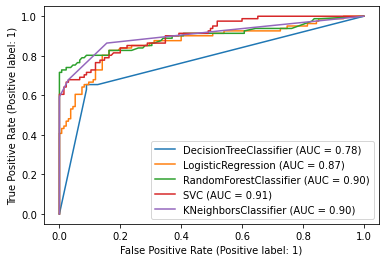

In [166]:
disp = plot_roc_curve(dt,x_test,y_test)
mod = [lr,rf,svc,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

**Finding:** Based on AUC plot, SVC again appears to be the best model, with Random Forest at a close second.

## Hyperparameter Tuning

### `Random Forest`

In [167]:
parameter = {'n_estimators':[30,50,60],
             'max_depth': [10,20,40,60,80],
             'min_samples_leaf':[5,10,15,20,30],
             'min_samples_split':[2,5,10,20],
             'criterion':['gini','entropy'],
             'max_features':["auto","sqrt","log2"]
            }

In [168]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [169]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [170]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [171]:
Best_mod1 = RandomForestClassifier(n_estimators = 50,
                                   criterion = 'entropy', 
                                   max_depth= 40, 
                                   max_features = 'log2', 
                                   min_samples_leaf = 5, 
                                   min_samples_split = 10)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

87.96296296296296


**Finding:** Random Forest Classifier has an accuracy of **`87.96%`**.

In [172]:
cm = confusion_matrix(y_test,rfpred)
cm

array([[133,   2],
       [ 24,  57]], dtype=int64)

In [173]:
cr = classification_report(y_test,rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       135
           1       0.97      0.70      0.81        81

    accuracy                           0.88       216
   macro avg       0.91      0.84      0.86       216
weighted avg       0.89      0.88      0.87       216



### `Support Vector Classifier`

In [176]:
param_grid = { 'C': [1,2,3,4,5,6,7,10],
             'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,1]
             }

In [178]:
gridsearch = GridSearchCV(svc, param_grid)

gridsearch.fit(x_train,y_train)

# best params
gridsearch.best_params_

{'C': 2, 'gamma': 0.1}

In [179]:
Best_mod2 = SVC(C=2, gamma=0.1)

Best_mod2.fit(x_train,y_train)
svcpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,svcpred)
print(acc*100)

85.18518518518519


**Finding:** Support Vector Classifier has an accuracy of **`85.18%`**.

In [180]:
cm = confusion_matrix(y_test,svcpred)
cm

array([[135,   0],
       [ 32,  49]], dtype=int64)

In [181]:
cr = classification_report(y_test,svcpred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       1.00      0.60      0.75        81

    accuracy                           0.85       216
   macro avg       0.90      0.80      0.82       216
weighted avg       0.88      0.85      0.84       216



### On comparison of scores post hyperparameter tuning, it is identified that `Random Forest Classifier` is the best model.

## Saving the model using joblib

In [182]:
joblib.dump(Best_mod1,"Titanic_project.pkl")

['Titanic_project.pkl']

In [183]:
mod=joblib.load("Titanic_project.pkl")

In [184]:
print(mod.predict(x_test))

[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0]
